<a href="https://colab.research.google.com/github/drAshcroft/MAT421_Brian/blob/main/ModuleB_17_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17.4 Polynomial regression allows more control over the curvature and behavior of the system

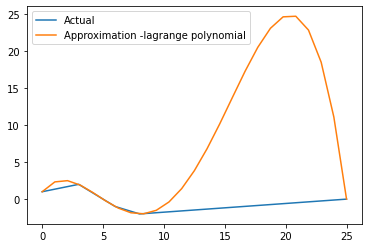

In [4]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import lagrange
xx=np.linspace(0,25,25)
x=[0,3,6,8,25]
y=[1,2,-1,-2,0]

plt.plot(x,y,label='Actual')
plt.plot(xx,lagrange(x, y)(xx),label='Approximation -lagrange polynomial')
 
plt.legend()
plt.show()

17.5 Newton polynomials.  This uses a polynomial approxiamtion to make a path through all the data points.

Stealing the functions from the book to show how this works for our functions

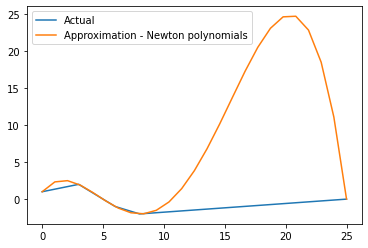

In [5]:
def divided_diff(x, y): 
    ''' 
    function to calculate the divided 
    differences table 
    ''' 
    n = len(y) 
    coef = np.zeros([n, n]) 
    # the first column is y 
    coef[:,0] = y 
     
    for j in range(1,n): 
        for i in range(n-j): 
            coef[i][j] =  (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i]) 
             
    return coef 
 
def newton_poly(coef, x_data, x): 
    ''' 
    evaluate the newton polynomial  
    at x 
    ''' 
    
    n = len(x_data) - 1  
    p = coef[n] 
    for k in range(1,n+1): 
        p = coef[n-k] + (x -x_data[n-k])*p 
    return p 

plt.plot(x,y,label='Actual')

a_s = divided_diff(x, y)[0, :] 
plt.plot(xx,newton_poly(a_s, x, xx),label='Approximation - Newton polynomials')
 
plt.legend()
plt.show()    